## Data Preparation

In [1]:
#Import various modules
import numpy as np
from scipy import optimize  #Used to fit the regression
import matplotlib.pyplot as plt
import pandas as pd  #Used for general data manipulation
import os
import statistics as stats
import scipy

### Import Data

In [2]:
#import outlet flow data
LG_df_list = [] #create empty list for gauges
gauge_dir_list = os.listdir("./data/LG_zero_flow_identified/") #create list of LG folder

#append datasets into the list
for i in range(len(gauge_dir_list)):
    year_df = pd.read_csv("./data/LG_zero_flow_identified/"+gauge_dir_list[i], skiprows=18, parse_dates= ['DateTime'])
    year_df[year_df == -6999.00] = np.nan
    year_df['doy'] =  year_df['DateTime'].dt.strftime('%j') #add doy column
    year_df = year_df.set_index('DateTime')
    LG_df_list.append(year_df)
    
#take daily average of gauge flow, stream temp, and stream EC
LG_daily_avg = []
for i in range(len(LG_df_list)):
    year_avg = LG_df_list[i].groupby(pd.Grouper(freq='1D')).mean()
    year_avg = year_avg.reset_index()
    year_avg['doy'] = year_avg['DateTime'].dt.strftime('%j').astype(int) #add doy column
    year_avg = year_avg.set_index('DateTime')
    LG_daily_avg.append(year_avg)
    
#take daily average of gauge flow, stream temp, and stream EC
LG_daily_min = []
for i in range(len(LG_df_list)):
    year_min = LG_df_list[i].groupby(pd.Grouper(freq='1D')).min()
    year_min = year_min.reset_index()
    year_min['doy'] = year_min['DateTime'].dt.strftime('%j').astype(int) #add doy column
    year_min = year_min.set_index('DateTime')
    LG_daily_min.append(year_min)

In [3]:
## Covert all Discharge data to Water Year ##
LG_all = pd.concat(LG_daily_avg, axis = 0).reset_index()
LG_WY = []
LG_WY_2001 = LG_all[LG_all['DateTime'].between('2000-10-01', '2001-09-30')]
LG_WY.append(LG_WY_2001)
LG_WY_2002 = LG_all[LG_all['DateTime'].between('2001-10-01', '2002-09-30')]
LG_WY.append(LG_WY_2002)
LG_WY_2003 = LG_all[LG_all['DateTime'].between('2002-10-01', '2003-09-30')]
LG_WY.append(LG_WY_2003)
LG_WY_2004 = LG_all[LG_all['DateTime'].between('2003-10-01', '2004-09-30')]
LG_WY.append(LG_WY_2004)
LG_WY_2005 = LG_all[LG_all['DateTime'].between('2004-10-01', '2005-09-30')]
LG_WY.append(LG_WY_2005)
LG_WY_2006 = LG_all[LG_all['DateTime'].between('2005-10-01', '2006-09-30')]
LG_WY.append(LG_WY_2006)
LG_WY_2007 = LG_all[LG_all['DateTime'].between('2006-10-01', '2007-09-30')]
LG_WY.append(LG_WY_2007)
LG_WY_2008 = LG_all[LG_all['DateTime'].between('2007-10-01', '2008-09-30')]
LG_WY.append(LG_WY_2008)
LG_WY_2009 = LG_all[LG_all['DateTime'].between('2008-10-01', '2009-09-30')]
LG_WY.append(LG_WY_2009)
LG_WY_2010 = LG_all[LG_all['DateTime'].between('2009-10-01', '2010-09-30')]
LG_WY.append(LG_WY_2010)
LG_WY_2011 = LG_all[LG_all['DateTime'].between('2010-10-01', '2011-09-30')]
LG_WY.append(LG_WY_2011)
LG_WY_2012 = LG_all[LG_all['DateTime'].between('2011-10-01', '2012-09-30')]
LG_WY.append(LG_WY_2012)
LG_WY_2013 = LG_all[LG_all['DateTime'].between('2012-10-01', '2013-09-30')]
LG_WY.append(LG_WY_2013)
LG_WY_2014 = LG_all[LG_all['DateTime'].between('2013-10-01', '2014-09-30')]
LG_WY.append(LG_WY_2014)
LG_WY_2015 = LG_all[LG_all['DateTime'].between('2014-10-01', '2015-09-30')]
LG_WY.append(LG_WY_2015)
LG_WY_2016 = LG_all[LG_all['DateTime'].between('2015-10-01', '2016-09-30')]
LG_WY.append(LG_WY_2016)
LG_WY_2017 = LG_all[LG_all['DateTime'].between('2016-10-01', '2017-09-30')]
LG_WY.append(LG_WY_2017)
LG_WY_2018 = LG_all[LG_all['DateTime'].between('2017-10-01', '2018-09-30')]
LG_WY.append(LG_WY_2018)
LG_WY_2019 = LG_all[LG_all['DateTime'].between('2018-10-01', '2019-09-30')]
LG_WY.append(LG_WY_2019)
LG_WY_2020 = LG_all[LG_all['DateTime'].between('2019-10-01', '2020-09-30')]
LG_WY.append(LG_WY_2020)
LG_WY_2021 = LG_all[LG_all['DateTime'].between('2020-10-01', '2021-09-30')]
LG_WY.append(LG_WY_2021)
LG_WY_2022 = LG_all[LG_all['DateTime'].between('2021-10-01', '2022-09-30')]
LG_WY.append(LG_WY_2022)

In [4]:
## Import Bogus Snotel Data Daily ##
snotel_dir_list = ['978_ALL_WATERYEAR=2000.csv','978_ALL_WATERYEAR=2001.csv','978_ALL_WATERYEAR=2002.csv','978_ALL_WATERYEAR=2003.csv',\
                   '978_ALL_WATERYEAR=2004.csv','978_ALL_WATERYEAR=2005.csv','978_ALL_WATERYEAR=2006.csv','978_ALL_WATERYEAR=2007.csv','978_ALL_WATERYEAR=2008.csv',\
                   '978_ALL_WATERYEAR=2009.csv','978_ALL_WATERYEAR=2010.csv','978_ALL_WATERYEAR=2011.csv','978_ALL_WATERYEAR=2012.csv','978_ALL_WATERYEAR=2013.csv',\
                   '978_ALL_WATERYEAR=2014.csv','978_ALL_WATERYEAR=2015.csv','978_ALL_WATERYEAR=2016.csv','978_ALL_WATERYEAR=2017.csv','978_ALL_WATERYEAR=2018.csv',\
                   '978_ALL_WATERYEAR=2019.csv','978_ALL_WATERYEAR=2020.csv','978_ALL_WATERYEAR=2021.csv','978_ALL_WATERYEAR=2022.csv','978_ALL_WATERYEAR=2023.csv' ]
snotel_daily = []# create empty list for gauges

#append datasets into the list
for i in range(len(snotel_dir_list)):
    year_df = pd.read_csv("./data/SNOTEL_WY/"+snotel_dir_list[i], skiprows=4, parse_dates= ['Date'])
    year_df[year_df == -99.00] = np.nan # set NaN values
    year_df[year_df == -99.9] = np.nan # set NaN values
    year_df[year_df == 'NaN'] = np.nan # set NaN values
    year_df['doy'] =  year_df['Date'].dt.strftime('%j').astype(int) #add doy column
    year_df = year_df.set_index('Date')
    year_df['SWE'] = year_df['WTEQ.I-1 (in) ']
    year_df.loc[year_df['PREC.I-1 (in) '] < 0, 'PREC.I-1 (in) '] = 0 # remove any days that have negative cumulative precip
    year_df['Discrete_Precip_in'] = np.diff(year_df['PREC.I-1 (in) '], prepend=0) # create discrete precip column
    year_df.loc[year_df['Discrete_Precip_in'] < 0, 'Discrete_Precip_in'] = 0 # remove any days with negative precipitation
    snotel_daily.append(year_df)

In [5]:
dcew_et = pd.read_csv('./data/DCEW_ET/DCEW_ET.csv', skiprows=0) #open ET dataset

In [6]:
la_nina = pd.read_csv('./data/la_nina_el_nino/la_nina_el_nino.csv', skiprows=0) #open la nina/el nino dataset

### Plot Each Year Streamflow, Precip, Temp

C:\Users\thoma\AppData\Local\Temp\ipykernel_31500\2161579575.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15,5), facecolor='white')


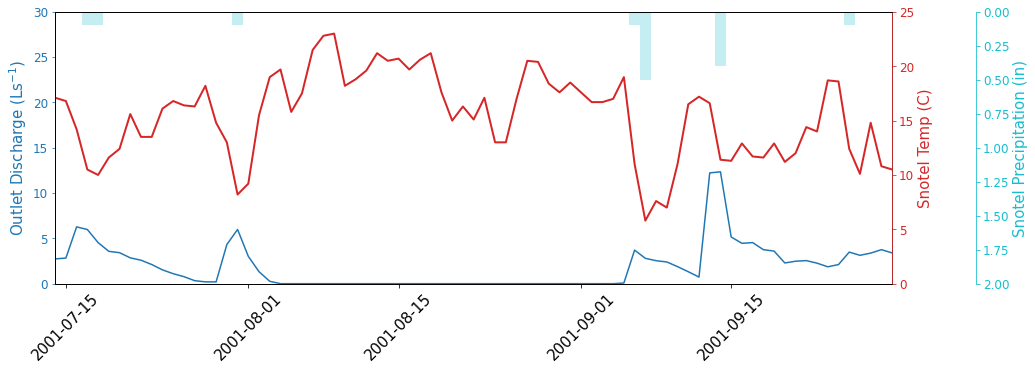

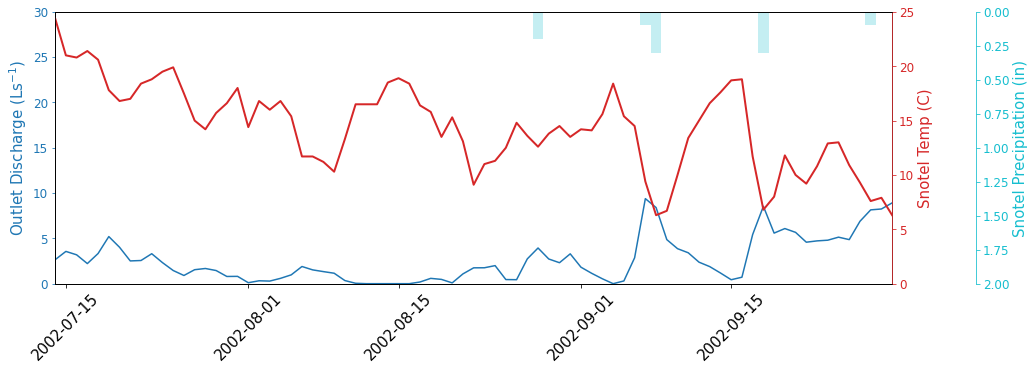

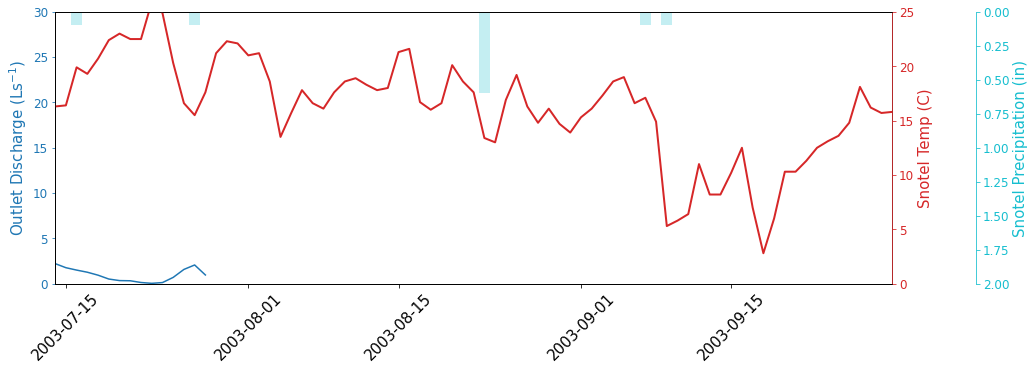

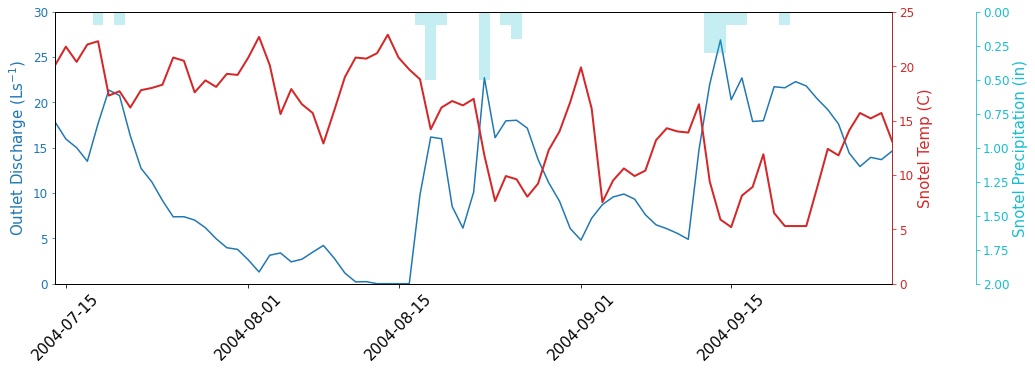

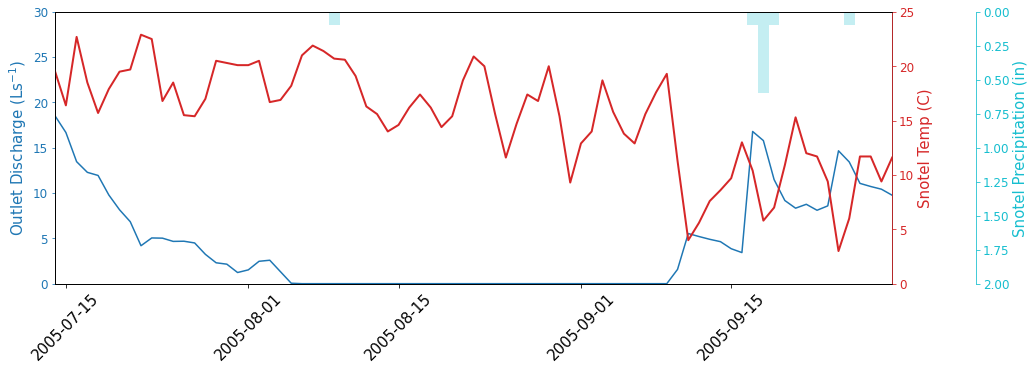

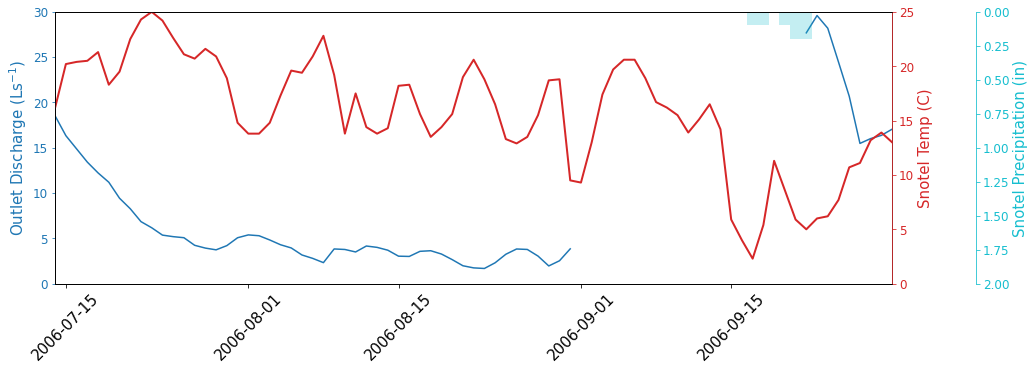

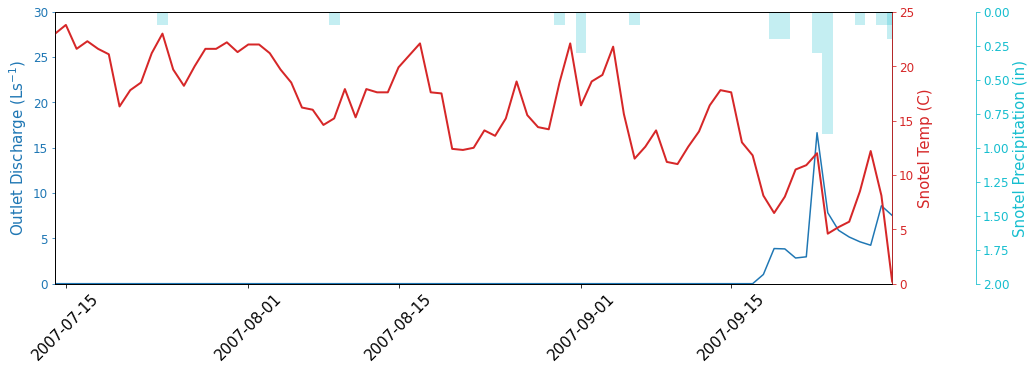

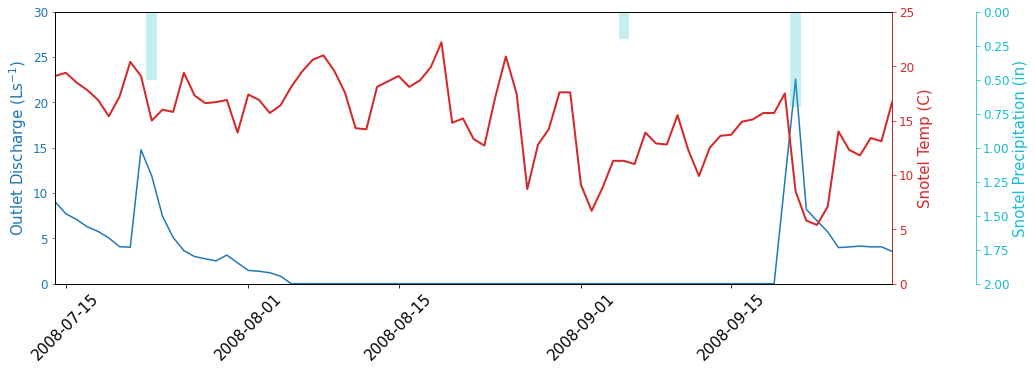

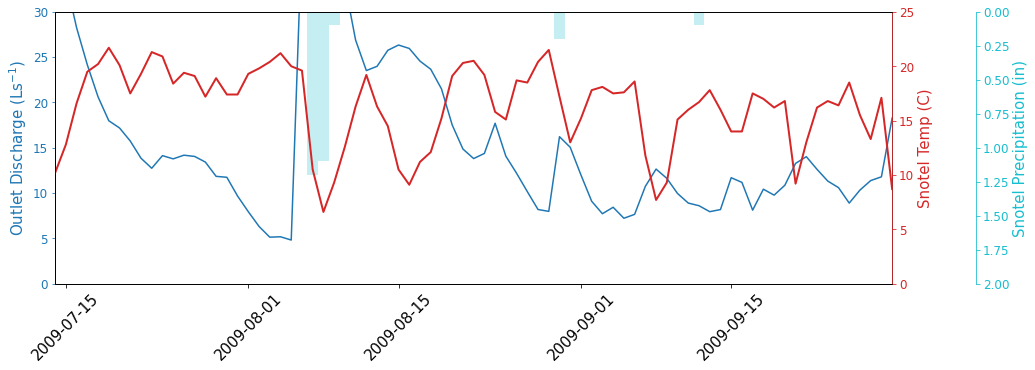

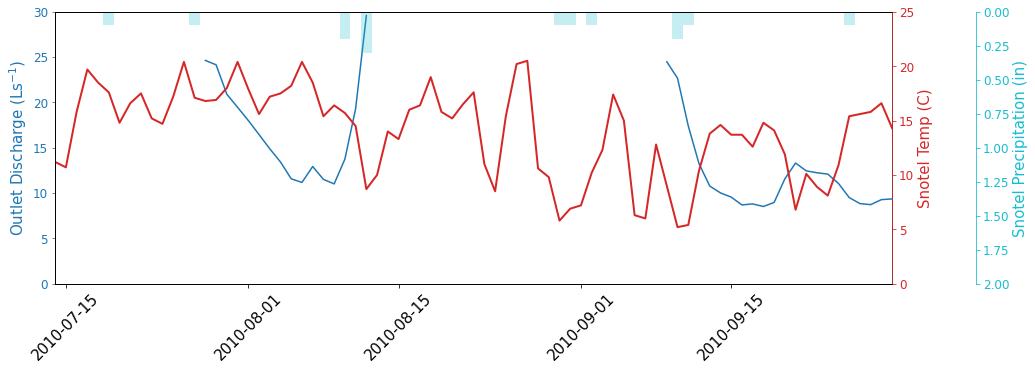

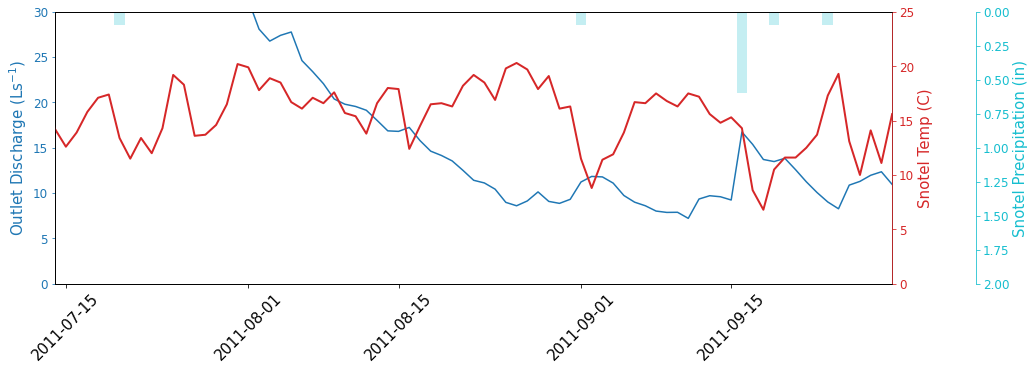

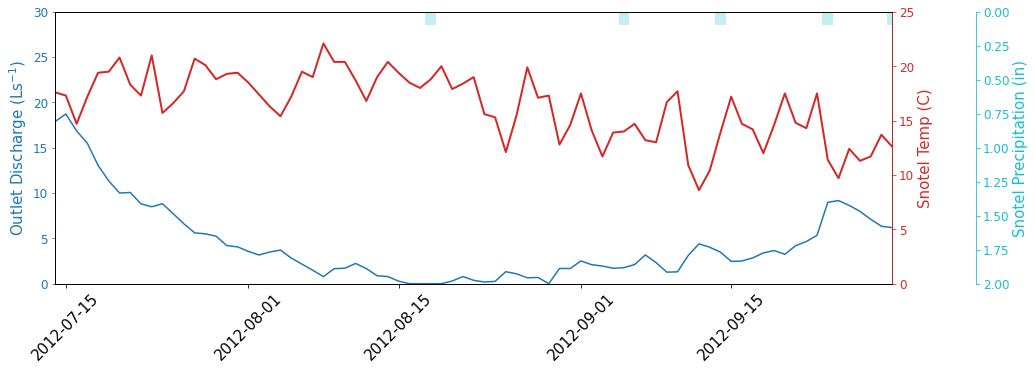

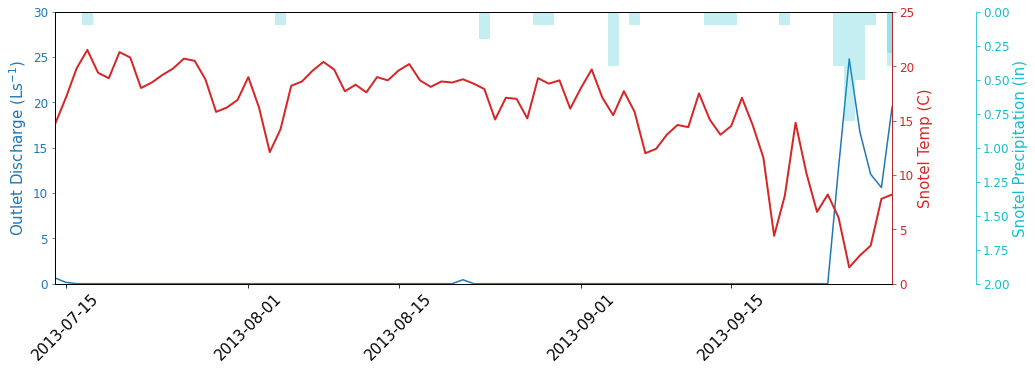

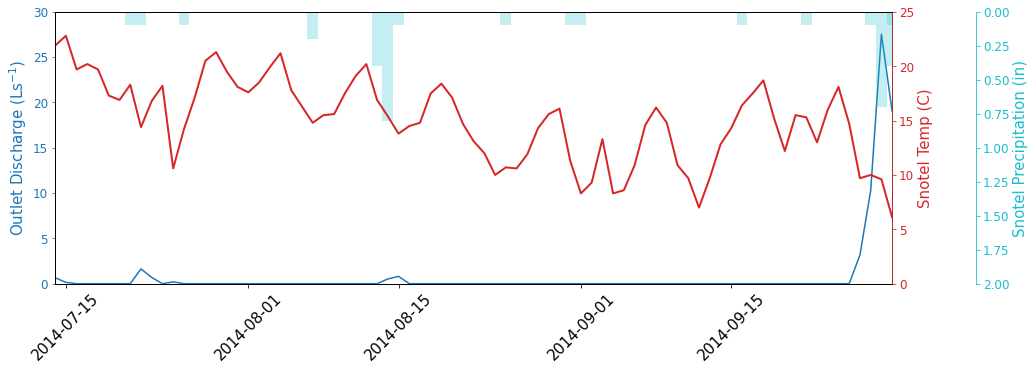

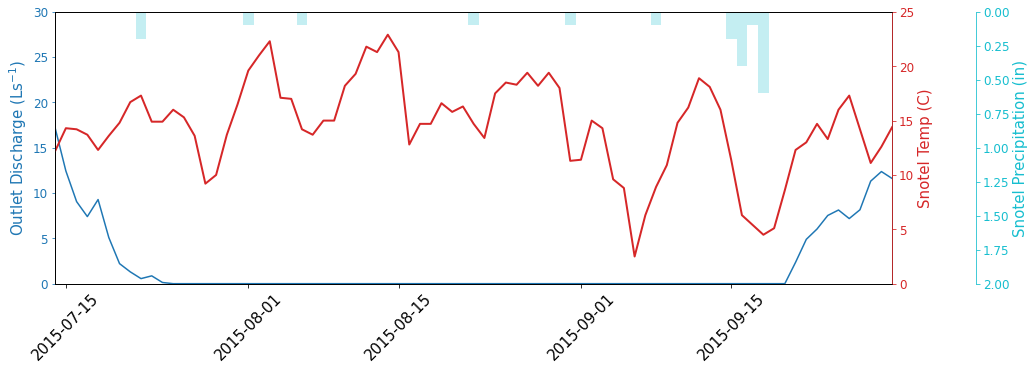

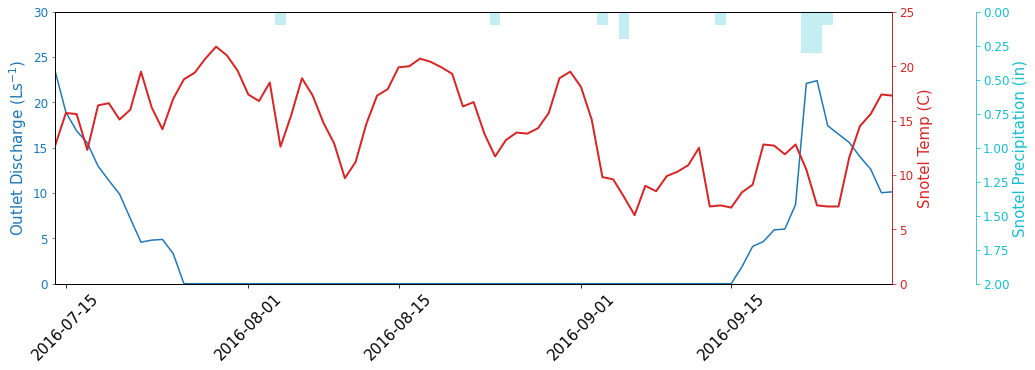

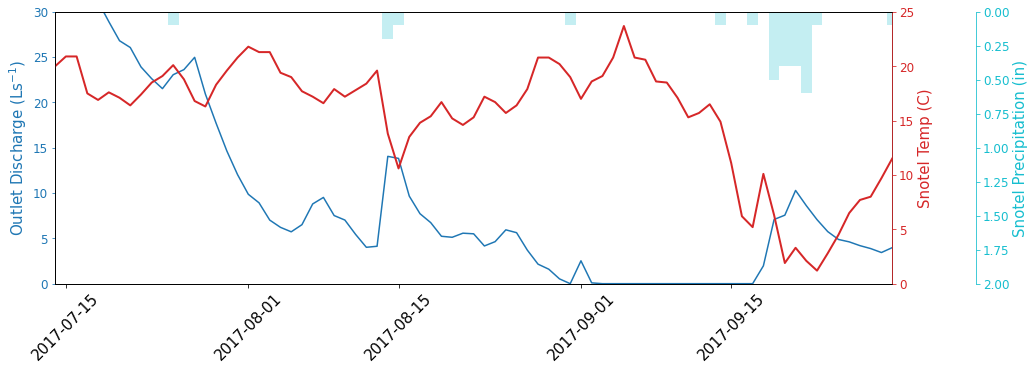

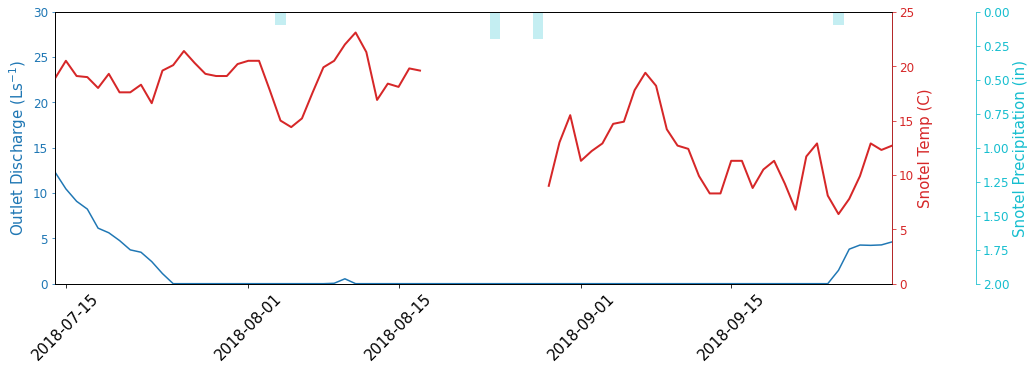

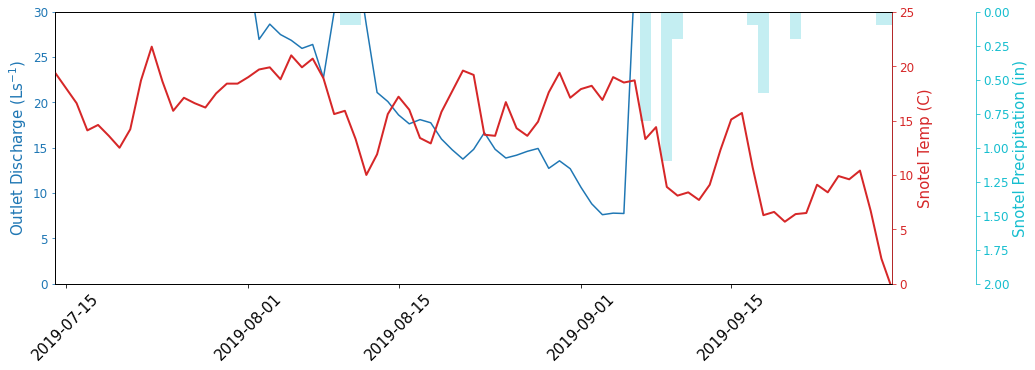

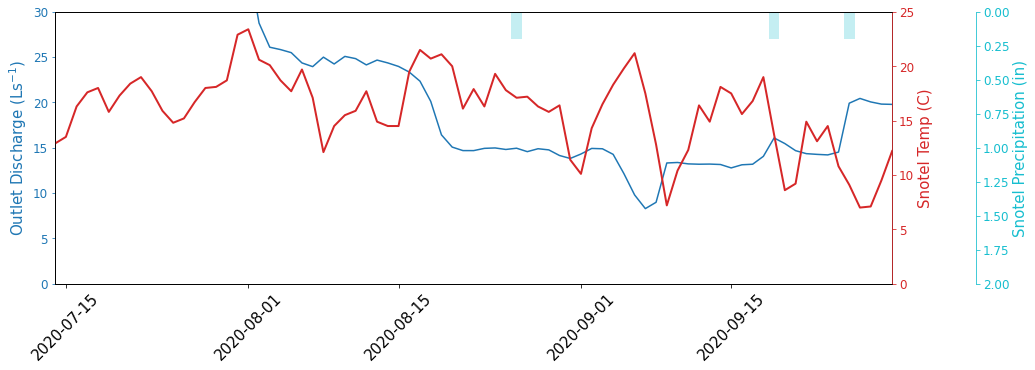

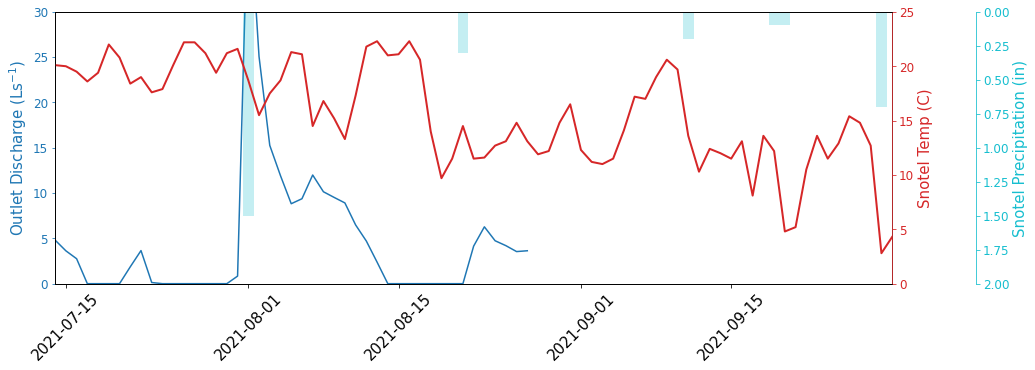

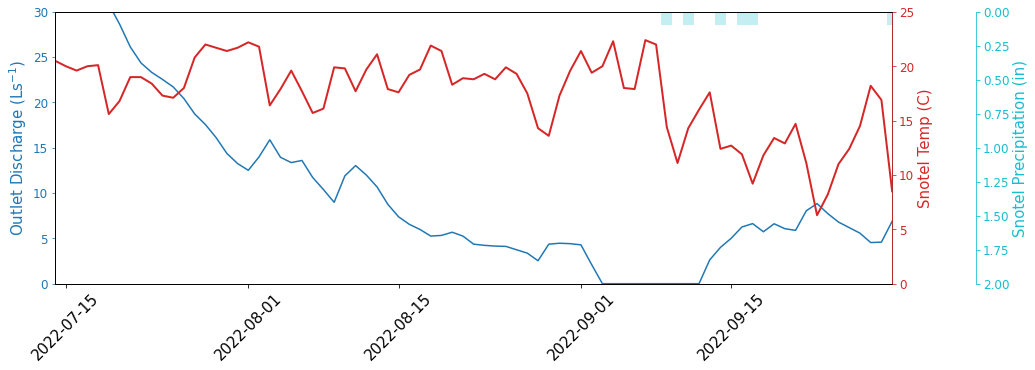

In [7]:
import datetime
year_range = range(2001, 2024)
for i in range(len(LG_WY)):
    fig = plt.figure(figsize=(15,5), facecolor='white')
    #ax1 = fig.add_subplot(i+1,1,1)
    ax1 = fig.add_subplot(1,1,1)
    snow = snotel_daily[i+1].reset_index()
    ax1.plot(LG_WY[i]['DateTime'], LG_WY[i]['Discharge_corr-L/s'])
    ax1.set_ylabel('Outlet Discharge (Ls$^{-1}$)', color = 'tab:blue', size = 15)
    ax1.set_xlim([datetime.date(year_range[i], 7, 14), datetime.date(year_range[i], 9, 30)])
    ax1.set_ylim([0, 30]) #set y axis limits
    ax1.tick_params(axis='y', colors='tab:blue', labelsize=12)
    ax1.tick_params(axis='x', labelsize=15, rotation = 45)
    
    ax2 = ax1.twinx()
    ax2.invert_yaxis()
    ax2.bar(snow['Date'], snow['Discrete_Precip_in'], color = 'tab:cyan', width=1, label = '_nolabel_', alpha = 0.25, align='center')
    ax2.set_ylim([2, 0]) #set y axis limits
    ax2.tick_params(axis='y', colors='tab:cyan', labelsize=12)
    ax2.set_ylabel('Snotel Precipitation (in)', color = 'tab:cyan', size = 15)
    ax2.spines['right'].set_position(("axes", 1.1))
    ax2.spines['right'].set_color('tab:cyan')
    ax2.patch.set_visible(False)
    
    ax3 = ax1.twinx()
    ax3.plot(snow['Date'], snow['TAVG.D-1 (degC) '], color = 'tab:red', linewidth= 2, label = '_nolabel_')
    #ax3.plot(snow['Date'], snow['TAVG.D-1 (degC) '].rolling(3).mean(), color = 'tab:orange') #rolling average temp
    ax3.set_ylim([0, 25]) #set y axis limits
    ax3.tick_params(axis='y', colors='tab:red', labelsize=12)
    ax3.set_ylabel('Snotel Temp (C)', color = 'tab:red', size = 15)
    ax3.spines['right'].set_position(("axes", 1))
    ax3.spines['right'].set_color('tab:red')
    ax3.patch.set_visible(False)      

# Climate Predictor Variables 

### Naming Convention Information
WY = current water year data
WY-1 = antecedent water year data
JFM = January February March
MAJ = March April June
JAS = July August September
OND = October November December

In [8]:
# Initiate Dataframe where each row is a year from 2000 - 2023
master_data = pd.DataFrame()
master_data['year'] = range(2000, 2024)

### Streamflow

In [9]:
## maximum streamflow ##
year_range = range(2000, 2024)
master_data['max_discharge_Ls'] = ' ' 
for i in range(len(LG_daily_avg)): 
    LG_year = LG_daily_avg[i].loc[str(year_range[i]-1)+'-10-01':str(year_range[i])+'-8-31'] # get max streamflow before drying occurs
    LG_max = np.nanmax(LG_year['Discharge-L/s'])
    master_data.at[i, 'max_discharge_Ls'] = LG_max

In [10]:
## day of maximum streamflow ##
master_data['max_discharge_doy'] = ' ' 
for i in range(len(LG_daily_avg)):
    LG_year = LG_daily_avg[i].loc[str(year_range[i]-1)+'-10-01':str(year_range[i])+'-8-31'] # get max streamflow before drying occurs
    LG_max = np.nanmax(LG_year['Discharge-L/s'])
    day_of_max_flow = LG_daily_avg[i]['doy'][LG_daily_avg[i]['Discharge-L/s'] == LG_max][0]
    master_data.at[i, 'max_discharge_doy'] = day_of_max_flow

In [11]:
## Water Year Volume Passed ##
master_data['total_acft_passed_WY'] = ' ' 
for i in range(len(LG_WY)): 
    flow_passed = np.nansum(LG_WY[i]['Discharge_corr-L/s']*86400)*8.1071319378991E-7  # multiply  average daily flow in L/s*seconds per day to get volume * acre feet conversion
    master_data.at[i+1, 'total_acft_passed_WY'] = flow_passed

### SWE

In [12]:
## Max SWE ##
master_data['SWE_max_WY'] = ' ' 
for i in range(len(snotel_daily)): 
    snotel_swe = snotel_daily[i]['SWE'] 
    max_swe = max(snotel_swe)
    master_data.at[i, 'SWE_max_WY'] = max_swe
    
## Antecedent SWE ## 
master_data['SWE_max_WY-1'] = master_data['SWE_max_WY'].shift(1)

In [13]:
## Day of Max SWE ##
master_data['SWE_max_doy'] = ' ' 
for i in range(len(snotel_daily)): 
    snotel_swe = snotel_daily[i]['SWE']
    snotel_doy = snotel_daily[i]['doy'].astype(int)
    max_swe = max(snotel_swe)
    day_of_max_swe = snotel_doy[snotel_daily[i]['SWE'] == max_swe][-1] # [-1] pulls last day of peak swe
    master_data.at[i, 'SWE_max_doy'] = day_of_max_swe

In [14]:
## Last Day of Snow ## 
master_data['full_melt_doy'] = ' ' 
for i in range(len(snotel_daily)): 
    snotel_swe = snotel_daily[i][90:300]
    no_swe = snotel_swe[snotel_swe['SWE'] == 0]
    if len(no_swe) > 0:
        first_day = no_swe['doy'][0]
    master_data.at[i, 'full_melt_doy'] = first_day

In [15]:
## Peak SWE to full melt duration ##
master_data[master_data == ' '] = np.nan #set nan values in empty locations
master_data['peak_to_melt_duration'] = ' ' 
for i in range(len(snotel_daily)): 
    peak_to_melt = master_data['full_melt_doy'][i] - int(master_data['SWE_max_doy'][i])
    master_data.at[i, 'peak_to_melt_duration'] = peak_to_melt

### Precipitation

In [16]:
## cumulative precip of water year ##
## P = precipitation, WY = current year ##
master_data['cum_P_WY'] = ' ' 
for i in range(len(snotel_daily)-1): 
    precip_range = snotel_daily[i]['PREC.I-1 (in) ']
    cum_precip = max(precip_range)
    master_data.at[i, 'cum_P_WY'] = cum_precip
    
## antecedent cum precip ## 
## P = precipitation, CY-1 = antecedent year or CY minus 1 ##
master_data['cum_P_WY-1'] = master_data['cum_P_WY'].shift(1)

In [17]:
## proportion swe ## 
master_data[master_data == ' '] = np.nan #set nan values in empty locations
master_data[master_data == 'NaN'] = np.nan
master_data = master_data.apply(pd.to_numeric)
master_data['SWE-P_WY'] = ' ' 
master_data['SWE-P_WY'] = master_data['SWE_max_WY']/master_data['cum_P_WY']

In [18]:
## Spring Precip March, April, May ##
master_data['P_MAM_WY'] = ' ' 
for i in range(len(snotel_daily)): 
    snotel = snotel_daily[i]
    temp_range = snotel.iloc[152:243] #March 1 - May 31
    mean_temp_after_melt = np.nansum(temp_range['Discrete_Precip_in'])
    master_data.at[i, 'P_MAM_WY'] = mean_temp_after_melt
    
## Summer Precip June, July, August ##
master_data['P_JJA_WY'] = ' ' 
for i in range(len(snotel_daily)): 
    snotel = snotel_daily[i]
    temp_range = snotel.iloc[243:335] # June 1 - August 30
    mean_temp_after_melt = np.nansum(temp_range['Discrete_Precip_in'])
    master_data.at[i, 'P_JJA_WY'] = mean_temp_after_melt  

In [19]:
## April, May, June Precip ##
year_range = range(2000, 2024)
master_data['P_AMJ_WY'] = ' ' 
for i in range(len(snotel_daily)):
    snotel = snotel_daily[i].loc[str(year_range[i])+'-04-01':str(year_range[i])+'-06-30'] # April 1 - June 30
    mean_precip = np.nansum(snotel['Discrete_Precip_in'])
    master_data.at[i, 'P_AMJ_WY'] = mean_precip 
    
## July, August, September Precip ##
master_data['P_JAS_WY'] = ' ' 
for i in range(len(snotel_daily)): 
    snotel = snotel_daily[i].loc[str(year_range[i])+'-07-01':str(year_range[i])+'-09-30']
    mean_precip  = np.nansum(snotel['Discrete_Precip_in'])
    master_data.at[i, 'P_JAS_WY'] = mean_precip 

## October, November, December Precip ##
master_data['P_OND_WY'] = ' ' 
for i in range(len(snotel_daily)): 
    snotel = snotel_daily[i].loc[str(year_range[i]-1)+'-10-01':str(year_range[i]-1)+'-12-31']# October 1 - December 31
    mean_precip  = np.nansum(snotel['Discrete_Precip_in'])
    master_data.at[i, 'P_OND_WY'] = mean_precip 
    
## January, February, March Precip ##
master_data['P_JFM_WY'] = ' ' 
for i in range(len(snotel_daily)): 
    snotel = snotel_daily[i].loc[str(year_range[i])+'-01-01':str(year_range[i])+'-03-31'] #January 1 - March 31
    mean_precip  = np.nansum(snotel['Discrete_Precip_in'])
    master_data.at[i, 'P_JFM_WY'] = mean_precip  

In [20]:
## Precip as snow vs as rain 
for i in range(len(snotel_daily)): 
    snotel = snotel_daily[i]
    snotel['P_as_snow'] = snotel['Discrete_Precip_in'][snotel['TOBS.I-1 (degC) '] <= 0]
    snotel['P_as_rain'] = snotel['Discrete_Precip_in'][snotel['TOBS.I-1 (degC) '] > 0]
    
## April, May, June Precip ##
master_data['P_as_snow_AMJ_WY'] = ' ' 
master_data['P_as_rain_AMJ_WY'] = ' '
for i in range(len(snotel_daily)): 
    snotel = snotel_daily[i].loc[str(year_range[i])+'-04-01':str(year_range[i])+'-06-30'] # April 1 - June 30
    mean_swe = np.nansum(snotel['P_as_snow'])
    master_data.at[i, 'P_as_snow_AMJ_WY'] = mean_swe
    mean_rain = np.nansum(snotel['P_as_rain'])
    master_data.at[i, 'P_as_rain_AMJ_WY'] = mean_rain
    
## July, August, September Precip ##
master_data['P_as_snow_JAS_WY'] = ' ' 
master_data['P_as_rain_JAS_WY'] = ' ' 
for i in range(len(snotel_daily)): 
    snotel = snotel_daily[i].loc[str(year_range[i])+'-07-01':str(year_range[i])+'-09-30'] #July 1 - Sept 30
    mean_precip = np.nansum(snotel['P_as_snow'])
    master_data.at[i, 'P_as_snow_JAS_WY'] = mean_precip
    mean_precip = np.nansum(snotel['P_as_rain'])
    master_data.at[i, 'P_as_rain_JAS_WY'] = mean_precip

## October, November, December Precip ##
master_data['P_as_snow_OND_WY'] = ' '
master_data['P_as_rain_OND_WY'] = ' ' 
for i in range(len(snotel_daily)): 
    snotel = snotel_daily[i].loc[str(year_range[i]-1)+'-10-01':str(year_range[i]-1)+'-12-31']# October 1 - December 31
    mean_precip = np.nansum(snotel['P_as_snow'])
    master_data.at[i, 'P_as_snow_OND_WY'] = mean_precip
    mean_precip = np.nansum(snotel['P_as_rain'])
    master_data.at[i, 'P_as_rain_OND_WY'] = mean_precip
    
## January, February, March Precip ##
master_data['P_as_snow_JFM_WY'] = ' ' 
master_data['P_as_rain_JFM_WY'] = ' '
for i in range(len(snotel_daily)): 
    snotel = snotel_daily[i].loc[str(year_range[i])+'-01-01':str(year_range[i])+'-03-31'] #January 1 - March 31
    mean_precip = np.nansum(snotel['P_as_snow'])
    master_data.at[i, 'P_as_snow_JFM_WY'] = mean_precip
    mean_precip = np.nansum(snotel['P_as_rain'])
    master_data.at[i, 'P_as_rain_JFM_WY'] = mean_precip  

In [21]:
## Antecedent Precip as SWE and Rain
master_data['P_as_snow_AMJ_WY-1'] =  master_data['P_as_snow_AMJ_WY'].shift(1)
master_data['P_as_rain_AMJ_WY-1'] = master_data['P_as_rain_AMJ_WY'].shift(1)
master_data['P_as_snow_JAS_WY-1'] = master_data['P_as_snow_JAS_WY'].shift(1)
master_data['P_as_rain_JAS_WY-1'] = master_data['P_as_rain_JAS_WY'].shift(1) 
master_data['P_as_snow_OND_WY-1'] = master_data['P_as_snow_OND_WY'].shift(1)
master_data['P_as_rain_OND_WY-1'] = master_data['P_as_rain_OND_WY'].shift(1) 
master_data['P_as_snow_JFM_WY-1'] = master_data['P_as_snow_JFM_WY'].shift(1) 
master_data['P_as_rain_JFM_WY-1'] = master_data['P_as_rain_JFM_WY'].shift(1)

In [22]:
## Fraction SWE by month
master_data['fraction_snow_AMJ_WY'] = master_data['P_as_snow_AMJ_WY']/(master_data['P_as_snow_AMJ_WY'] + master_data['P_as_rain_AMJ_WY'])
master_data['fraction_snow_JAS_WY'] = master_data['P_as_snow_JAS_WY']/(master_data['P_as_snow_JAS_WY'] + master_data['P_as_rain_JAS_WY'])
master_data['fraction_snow_OND_WY'] = master_data['P_as_snow_OND_WY']/(master_data['P_as_snow_OND_WY'] + master_data['P_as_rain_OND_WY'])
master_data['fraction_snow_JFM_WY'] = master_data['P_as_snow_JFM_WY']/(master_data['P_as_snow_JFM_WY'] + master_data['P_as_rain_JFM_WY'])

master_data['fraction_snow_AMJ_WY-1'] = master_data['fraction_snow_AMJ_WY'].shift(1)
master_data['fraction_snow_JAS_WY-1'] = master_data['fraction_snow_JAS_WY'].shift(1)
master_data['fraction_snow_OND_WY-1'] = master_data['fraction_snow_OND_WY'].shift(1)
master_data['fraction_snow_JFM_WY-1'] = master_data['fraction_snow_JFM_WY'].shift(1)

In [23]:
## Antecedent Precipitation 
master_data['P_MAM_WY-1'] = master_data['P_MAM_WY'].shift(1)
master_data['P_JJA_WY-1'] = master_data['P_JJA_WY'].shift(1)
master_data['P_AMJ_WY-1'] = master_data['P_AMJ_WY'].shift(1)
master_data['P_JAS_WY-1'] = master_data['P_JAS_WY'].shift(1)
master_data['P_OND_WY-1'] = master_data['P_OND_WY'].shift(1)
master_data['P_JFM_WY-1'] = master_data['P_JFM_WY'].shift(1)

In [24]:
## Monthly Precipitation ## 

for i in range(len(snotel_daily)-1): 
    month_sum = snotel_daily[i].groupby(pd.Grouper(freq='M')).sum() 
    master_data.at[i, 'P_October'] = month_sum['Discrete_Precip_in'][0] 
    master_data.at[i, 'P_November'] = month_sum['Discrete_Precip_in'][1]
    master_data.at[i, 'P_December'] = month_sum['Discrete_Precip_in'][2]
    master_data.at[i, 'P_January'] = month_sum['Discrete_Precip_in'][3]
    master_data.at[i, 'P_February'] = month_sum['Discrete_Precip_in'][4]
    master_data.at[i, 'P_March'] = month_sum['Discrete_Precip_in'][5]
    master_data.at[i, 'P_April'] = month_sum['Discrete_Precip_in'][6] #April is 7th month of water year, count starts at zero
    master_data.at[i, 'P_May'] = month_sum['Discrete_Precip_in'][7]
    master_data.at[i, 'P_June'] = month_sum['Discrete_Precip_in'][8]
    master_data.at[i, 'P_July'] = month_sum['Discrete_Precip_in'][9]
    master_data.at[i, 'P_August'] = month_sum['Discrete_Precip_in'][10]
    master_data.at[i, 'P_September'] = month_sum['Discrete_Precip_in'][11]

### Temperature

In [25]:
## Tmean_WY
master_data['Tmean_WY'] = ' ' 
for i in range(len(snotel_daily)): 
    snotel = snotel_daily[i]
    mean_temp = np.nanmean(snotel['TAVG.D-1 (degC) '])
    master_data.at[i, 'Tmean_WY'] = mean_temp

## Antecedent WY Temperature
master_data['Tmean_WY-1'] = master_data['Tmean_WY'].shift(1)   
    

In [26]:
## Mean Temperature from Peak SWE to full melt ## 
master_data['Tmean_melt_period'] = ' ' 
for i in range(len(snotel_daily)): 
    snotel = snotel_daily[i]
    temp_range = snotel.iloc[int(master_data['SWE_max_doy'][i]):int(master_data['full_melt_doy'][i])]
    mean_temp_melt_period = np.nanmean(temp_range['TAVG.D-1 (degC) '])
    master_data.at[i, 'Tmean_melt_period'] = mean_temp_melt_period

In [27]:
## Mean Temperature from full melt to Sept 1 ## 
master_data['Tmean_after_melt'] = ' ' 
for i in range(len(snotel_daily)-1): 
    snotel = snotel_daily[i]
    temp_range = snotel.iloc[int(master_data['full_melt_doy'][i]):244]
    mean_temp_after_melt = np.nanmean(temp_range['TAVG.D-1 (degC) '])
    master_data.at[i, 'Tmean_after_melt'] = mean_temp_after_melt

In [28]:
## Spring Temperature March, April, May ##
master_data['Tmean_MAM_WY'] = ' ' 
for i in range(len(snotel_daily)): 
    snotel = snotel_daily[i][str(year_range[i])+'-03-01':str(year_range[i])+'-05-31'] #March 1 - May 31
    mean_temp = np.nanmean(snotel['TAVG.D-1 (degC) '])
    master_data.at[i, 'Tmean_MAM_WY'] = mean_temp
    
## Summer Temperature June, July, August ##
master_data['Tmean_JJA_WY'] = ' ' 
for i in range(len(snotel_daily)): 
    snotel = snotel_daily[i][str(year_range[i])+'-06-01':str(year_range[i])+'-08-31'] # June 1 - August 30
    mean_temp = np.nanmean(snotel['TAVG.D-1 (degC) '])
    master_data.at[i, 'Tmean_JJA_WY'] = mean_temp

In [29]:
## April, May, June Temp ##
master_data['Tmean_AMJ_WY'] = ' ' 
for i in range(len(snotel_daily)): 
    snotel = snotel_daily[i].loc[str(year_range[i])+'-04-01':str(year_range[i])+'-06-30'] # April 1 - June 30
    mean_temp = np.nanmean(snotel['TAVG.D-1 (degC) '])
    master_data.at[i, 'Tmean_AMJ_WY'] = mean_temp
    
## July, August, September Temp ##
master_data['Tmean_JAS_WY'] = ' ' 
for i in range(len(snotel_daily)): 
    snotel = snotel_daily[i].loc[str(year_range[i])+'-07-01':str(year_range[i])+'-09-30'] # July 1 - September 30
    mean_temp = np.nanmean(snotel['TAVG.D-1 (degC) '])
    master_data.at[i, 'Tmean_JAS_WY'] = mean_temp
    
## October, November, DecemberTemp ##
master_data['Tmean_OND_WY'] = ' ' 
for i in range(len(snotel_daily)): 
    snotel = snotel_daily[i].loc[str(year_range[i]-1)+'-10-01':str(year_range[i]-1)+'-12-31']# October 1 - December 31
    mean_temp = np.nanmean(snotel['TAVG.D-1 (degC) '])
    master_data.at[i, 'Tmean_OND_WY'] = mean_temp

## January, February, March Temp ##
master_data['Tmean_JFM_WY'] = ' ' 
for i in range(len(snotel_daily)): 
    snotel = snotel_daily[i].loc[str(year_range[i])+'-01-01':str(year_range[i])+'-03-31'] # Jan 1 - Mar 31
    mean_temp = np.nanmean(snotel['TAVG.D-1 (degC) '])
    master_data.at[i, 'Tmean_JFM_WY'] = mean_temp 

In [30]:
## Antecedent Temperature
master_data['Tmean_MAM_WY-1'] = master_data['Tmean_MAM_WY'].shift(1)
master_data['Tmean_JJA_WY-1'] = master_data['Tmean_JJA_WY'].shift(1)
master_data['Tmean_AMJ_WY-1'] = master_data['Tmean_AMJ_WY'].shift(1)
master_data['Tmean_JAS_WY-1'] = master_data['Tmean_JAS_WY'].shift(1)
master_data['Tmean_OND_WY-1'] = master_data['Tmean_OND_WY'].shift(1)
master_data['Tmean_JFM_WY-1'] = master_data['Tmean_JFM_WY'].shift(1)

In [31]:
## Days above 20deg C ##
master_data['WY_days_above_20C'] = ' ' 
for i in range(len(snotel_daily)): 
    snotel = snotel_daily[i]
    days_above_20C = len(snotel['TAVG.D-1 (degC) '][snotel['TAVG.D-1 (degC) '] > 20])
    master_data.at[i, 'WY_days_above_20C'] = days_above_20C

In [32]:
## Days above 15deg C ##
master_data['WY_days_above_15C'] = ' ' 
for i in range(len(snotel_daily)): 
    snotel = snotel_daily[i]
    days_above = len(snotel['TAVG.D-1 (degC) '][snotel['TAVG.D-1 (degC) '] > 15])
    master_data.at[i, 'WY_days_above_15C'] = days_above

In [33]:
## Snotel Mean Temperature ##
for i in range(len(snotel_daily)-1): #-1 to remove 2023, not all data is collected yet
    month_avg = snotel_daily[i].groupby(pd.Grouper(freq='M')).mean()
    master_data.at[i, 'Tmean_October'] = month_avg['TAVG.D-1 (degC) '][0] # WY starts October 1
    master_data.at[i, 'Tmean_November'] = month_avg['TAVG.D-1 (degC) '][1]
    master_data.at[i, 'Tmean_December'] = month_avg['TAVG.D-1 (degC) '][2]
    master_data.at[i, 'Tmean_January'] = month_avg['TAVG.D-1 (degC) '][3]
    master_data.at[i, 'Tmean_February'] = month_avg['TAVG.D-1 (degC) '][4]
    master_data.at[i, 'Tmean_March'] = month_avg['TAVG.D-1 (degC) '][5]
    master_data.at[i, 'Tmean_April'] = month_avg['TAVG.D-1 (degC) '][6] #April is 7th month of water year, count starts at zero
    master_data.at[i, 'Tmean_May'] = month_avg['TAVG.D-1 (degC) '][7]
    master_data.at[i, 'Tmean_June'] = month_avg['TAVG.D-1 (degC) '][8]
    master_data.at[i, 'Tmean_July'] = month_avg['TAVG.D-1 (degC) '][9]
    master_data.at[i, 'Tmean_August'] = month_avg['TAVG.D-1 (degC) '][10]
    master_data.at[i, 'Tmean_September'] = month_avg['TAVG.D-1 (degC) '][11]

### ET

In [34]:
master_data = pd.concat([master_data, dcew_et], axis=1)

In [35]:
## Aridity (cum_precip/cumET) ##
master_data['ET_Aridity_WY'] = master_data['cum_P_WY']/master_data['ET_cum_WY']
master_data['ET_Aridity_WY-1'] = master_data['ET_Aridity_WY'].shift(1)

master_data['PET_Aridity_WY'] = master_data['cum_P_WY']/master_data['PET_cum_WY']
master_data['PET_Aridity_WY-1'] = master_data['PET_Aridity_WY'].shift(1)

### La Nina Index

In [36]:
#la_nina = la_nina.drop(['year'], axis=1)
la_nina_avg = pd.DataFrame()
la_nina_avg['la_nina_WY'] = la_nina.loc[:, ['la_nina_OND_WY','la_nina_JFM_WY','la_nina_AMJ_WY','la_nina_JAS_WY']].mean(axis = 1)
la_nina_avg['la_nina_WY-1'] = la_nina_avg['la_nina_WY'].shift(1)
master_data = pd.concat([master_data, la_nina_avg], axis=1)

### Intermittency Hydrologic Indicators

In [37]:
zero_flow = 1 #set zero flow value. Assume that if there was a timestep with less than 1 L/s, the stream dried that day. 
master_data['days_no_flow_observed'] = ' ' 
#count days dry for each year
for i in range(len(LG_daily_min)): 
    LG_flow = LG_daily_min[i].loc[str(year_range[i]-1)+'-03-01':str(year_range[i])+'-12-01']['Discharge_corr-L/s']
    LG_zero = LG_flow[LG_flow <= zero_flow]
    LG_zero = pd.DataFrame(LG_zero)
    LG_zero.reset_index(inplace = True)
    days_dry = len(LG_zero)
    master_data.at[i, 'days_no_flow_observed'] = days_dry

In [38]:
## No flow Start Date ## 
master_data['no_flow_start_date_doy'] = ' ' 
for i in range(len(LG_daily_min)): 
    LG_year = LG_daily_avg[i].loc[str(year_range[i]-1)+'-03-01':str(year_range[i])+'-12-01']
    LG_zero = LG_year[LG_year['Discharge_corr-L/s'] <= zero_flow]
    if len(LG_zero) > 0:
        first_day = LG_zero['doy'][0]
        master_data.at[i, 'no_flow_start_date_doy'] = first_day
    else: 
        master_data.at[i, 'no_flow_start_date_doy'] = 'NaN'

In [39]:
## day flow returns ## 
master_data['flow_returns_doy'] = ' ' 
for i in range(len(LG_daily_min)): 
    LG_year = LG_daily_avg[i].loc[str(year_range[i]-1)+'-03-01':str(year_range[i])+'-12-01']
    LG_zero = LG_year[LG_year['Discharge_corr-L/s'] <= zero_flow]
    if len(LG_zero) > 0:
        flow_returns = LG_zero['doy'][-1]+1#pull last day in list of zero flow days and add 1 to get next day
        master_data.at[i, 'flow_returns_doy'] = flow_returns
    else: 
        master_data.at[i, 'flow_returns_doy'] = 'NaN' #if doesn't dry, say it dries on the last day  

In [40]:
## peak_discharge_to_dry_days ## 
master_data[master_data == ' '] = np.nan #set nan values in empty locations
master_data[master_data == 'NaN'] = np.nan
master_data['peak_discharge_to_dry_duration_days'] = ' ' 
master_data['peak_discharge_to_dry_duration_days'] = master_data['no_flow_start_date_doy'] - master_data['max_discharge_doy']

In [41]:
## antecedent days dry ## 
master_data['days_no_flow_observed_WY-1'] = master_data['days_no_flow_observed'].shift(1)

In [42]:
## Binary Indicator if Stream Dries or doesn't that year ## 
master_data['dry_binary'] = master_data['days_no_flow_observed']
master_data.loc[master_data['days_no_flow_observed'] >= 1, 'dry_binary'] = 1

In [43]:
## temp before and after flow returns
length_of_days_to_include = 5
rolling_val = 1
diff_periods = 2

for i in range(len(snotel_daily)): 
    day_returns = master_data['flow_returns_doy'][i]
    test_nan = np.isnan(day_returns)
    if test_nan == True:
        master_data.at[i, 'temp_before_flow_returns'] = 'NaN'
        master_data.at[i, 'temp_after_flow_returns'] = 'NaN'
    else:
        snotel = snotel_daily[i][(snotel_daily[i]['doy'] < day_returns+length_of_days_to_include) & (snotel_daily[i]['doy'] >= day_returns-length_of_days_to_include)]
        temp_before = snotel['TOBS.I-1 (degC) '].loc[snotel['doy'] < day_returns].mean()
        temp_after = snotel['TOBS.I-1 (degC) '].loc[snotel['doy'] >= day_returns].mean()
        master_data.at[i, 'temp_before_flow_returns'] = temp_before
        master_data.at[i, 'temp_after_flow_returns'] = temp_after
        precip_in_window = snotel['Discrete_Precip_in'].sum()
        master_data.at[i, 'precip_in_window'] = precip_in_window

## Export

In [44]:
master_data[master_data == ' '] = np.nan #set nan values in empty locations
master_data[master_data == 'NaN'] = np.nan
master_data = master_data.apply(pd.to_numeric)
display(master_data)
master_data.to_csv(r'./master_data/master_climate_data_all_variables.csv', index = False)

,year,max_discharge_Ls,max_discharge_doy,total_acft_passed_WY,SWE_max_WY,SWE_max_WY-1,SWE_max_doy,full_melt_doy,peak_to_melt_duration,cum_P_WY,...,la_nina_WY-1,days_no_flow_observed,no_flow_start_date_doy,flow_returns_doy,peak_discharge_to_dry_duration_days,days_no_flow_observed_WY-1,dry_binary,temp_before_flow_returns,temp_after_flow_returns,precip_in_window
0,2000,767.399875,95.0,NaN,28.8,NaN,85,136,51,29.2,...,NaN,16.0,204.0,213.0,109.0,NaN,1.0,15.84,17.32,0.0
1,2001,793.441333,80.0,2365.126703,20.6,28.8,105,136,31,23.5,...,-1.025,59.0,207.0,256.0,127.0,16.0,1.0,11.10,10.36,0.4
2,2002,1725.387208,104.0,2120.289109,27.8,20.6,93,146,53,24.7,...,-0.400,39.0,207.0,260.0,103.0,59.0,1.0,14.58,8.58,0.3
3,2003,586.480000,86.0,1961.054227,22.9,27.8,99,148,49,27.3,...,0.250,16.0,199.0,210.0,113.0,39.0,1.0,15.86,18.50,0.1
4,2004,1318.600792,83.0,2853.103167,28.7,22.9,72,137,65,28.3,...,0.450,14.0,224.0,230.0,141.0,16.0,1.0,18.72,13.78,0.7
5,2005,387.975292,139.0,1910.118478,20.2,28.7,96,140,44,25.8,...,0.375,44.0,217.0,253.0,78.0,14.0,1.0,12.90,4.36,0.0
6,2006,1708.888625,94.0,2882.994914,33.9,20.2,103,142,39,37.1,...,0.375,0.0,NaN,NaN,NaN,44.0,0.0,NaN,NaN,NaN
7,2007,403.405778,71.0,1515.357531,21.7,33.9,71,129,58,29.4,...,-0.300,76.0,188.0,261.0,117.0,0.0,1.0,11.82,8.22,0.4
8,2008,743.087542,127.0,2712.074608,30.0,21.7,104,151,47,29.6,...,-0.025,51.0,217.0,264.0,90.0,76.0,1.0,12.52,6.66,0.7
9,2009,907.262167,112.0,3166.229559,26.1,30.0,101,145,44,34.7,...,-1.000,0.0,NaN,NaN,NaN,51.0,0.0,NaN,NaN,NaN


## More Plots

-2.32235294117647

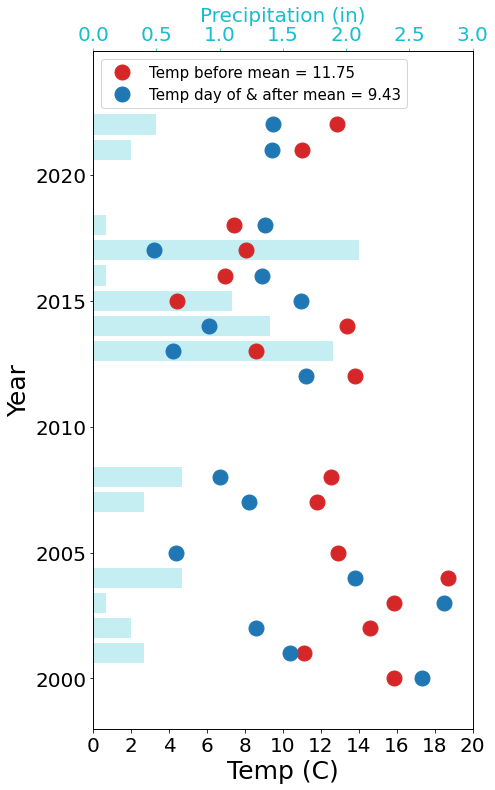

In [45]:
fig, ax1 = plt.subplots(1,1,figsize=(6,10), gridspec_kw={'height_ratios': [1]})
fig.tight_layout()
master_data[master_data == 'NaN'] = np.nan #set nan values
master_data[master_data == ' '] = np.nan #set nan values
master_data['temp_difference_before&after'] =  master_data['temp_after_flow_returns']-master_data['temp_before_flow_returns']
display(master_data['temp_difference_before&after'].mean())

#fig = plt.figure(figsize=(10,10))
#ax[0]=fig.add_subplot(1,1,1)
ax1.plot(master_data['temp_before_flow_returns'],master_data['year'], 'o', markersize = 15, color = 'tab:red', label='Temp before mean = '+str(round(master_data['temp_before_flow_returns'].mean(),2)))
ax1.plot(master_data['temp_after_flow_returns'], master_data['year'], 'o', markersize = 15, color = 'tab:blue', label='Temp day of & after mean = '+str(round(master_data['temp_after_flow_returns'].mean(),2)))
ax1.set_xlim([-0, 20])
ax1.set_ylim([1998, 2024.9])
ax1.set_ylabel('Year', size=25)
ax1.set_xlabel('Temp (C)', size=25)
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.legend(fontsize = 15, loc='upper left')
ax1.set_zorder(2)  # default zorder is 0 for ax1 and ax2
ax1.patch.set_visible(False)

#ax1.get_yaxis().set_visible(False)

ax2 = ax1.twiny()
ax2.barh(master_data['year'], master_data['precip_in_window'], color = 'tab:cyan', label = '_nolabel_', alpha = 0.25, align='center')
ax2.tick_params(axis='x', colors='tab:cyan', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax2.set_xlabel('Precipitation (in)', size=20, color = 'tab:cyan')
ax2.set_xlim([0, 3])
ax2.set_zorder(1)  # default zorder is 0 for ax1 and ax2
ax2.patch.set_visible(False)

#ax2.set_yticks(y_pos, labels=people)
fig.savefig('results/figures/Temp and rain when flow returns.png', dpi = 300, bbox_inches='tight')

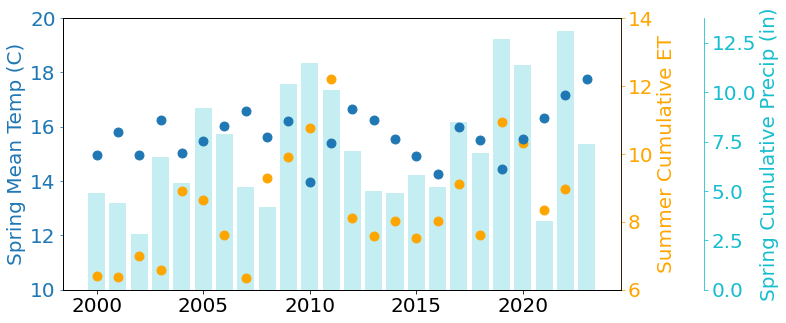

In [46]:
#discharge
axis_label_size = 20
fig, ax1 = plt.subplots(1,1,figsize=(10,5), gridspec_kw={'height_ratios': [1]})
ax1.scatter(master_data['year'],master_data['Tmean_JAS_WY'], label = 'Temp', s=80)
ax1.tick_params(axis='x', labelrotation=0, colors='black', labelsize=axis_label_size)
ax1.tick_params(axis='y', colors='tab:blue', labelsize=20)
#ax1.set_yticks(np.arange(10, 20, 2)) #set y axis ticks
ax1.set_ylim([10, 20]) #set y axis limits
ax1.set_ylabel('Spring Mean Temp (C)', size=axis_label_size, color = 'tab:blue')
ax1.set_zorder(4)  # default zorder is 0 for ax1 and ax2
ax1.patch.set_visible(False)

#SWE
#ax2 = ax1.twinx()
#ax2.scatter(master_data['year'],master_data['SWE_max_WY'], color = 'red',label = 'Temp', s=80)
#ax2.tick_params(axis='y', colors='red', labelsize=axis_label_size)
#ax2.spines['right'].set_position(("axes", 1.35))
#ax2.spines['right'].set_color('red')
#ax2.set_ylabel('Max SWE', size=axis_label_size, color = 'red')
#ax2.set_ylim([0, 50]) #set y axis limits
#ax2.set_yticks(np.arange(0, SWE_ymax + 0.1, 5)) #set y axis ticks
#ax2.tick_params(axis='y', colors='tab:orange', labelsize=axis_label_size)
#ax2.set_ylabel('Snotel SWE (in)', size=axis_label_size, color = 'tab:orange')
#ax2.patch.set_visible(False)
#ax2.set_zorder(3)  # default zorder is 0 for ax1 and ax2
#ax2.patch.set_visible(False)

#ET
ax4 = ax1.twinx()
ax4.scatter(master_data['year'],master_data['ET_JAS_WY'], color = 'orange', label = 'ET', s=80)
ax4.set_ylim([6, 14]) #set y axis limits
ax4.set_yticks(np.arange(6, 16, 2)) #set y axis ticks
ax4.tick_params(axis='y', colors='orange', labelsize=axis_label_size)
ax4.set_ylabel('Summer Cumulative ET', size=axis_label_size, color = 'orange')
#ax4.spines['right'].set_position(("axes", 1.1))
ax4.spines['right'].set_color('orange')
ax4.patch.set_visible(False)
ax4.set_zorder(2)  # default zorder is 0 for ax1 and ax2
ax4.patch.set_visible(False)

#Snotel Precip
ax5 = ax1.twinx()
#ax5.invert_yaxis()
ax5.bar(master_data['year'], master_data['P_AMJ_WY'], color = 'tab:cyan', label = 'Precip', alpha = 0.25, align='center')
#ax5.set_ylim([precip_ymax, 0]) #set y axis limits
#ax5.set_yticks(np.arange(0, precip_ymax + 0.1, 1)) #set y axis ticks
ax5.tick_params(axis='y', colors='tab:cyan', labelsize=axis_label_size)
ax5.set_ylabel('Spring Cumulative Precip (in)', size=axis_label_size, color = 'tab:cyan')
ax5.spines['right'].set_position(("axes", 1.15))
ax5.spines['right'].set_color('tab:cyan')
ax5.patch.set_visible(False)
ax5.set_zorder(1)  # default zorder is 0 for ax1 and ax2
ax5.patch.set_visible(False)

fig.savefig('./results/precip_ET', dpi=300, bbox_inches='tight')

In [47]:
dcew_et_month_avg = pd.read_csv("./data/DCEW_ET/DCEW_ET_month_mean_clean.csv", skiprows=0, parse_dates= ['DateTime'])

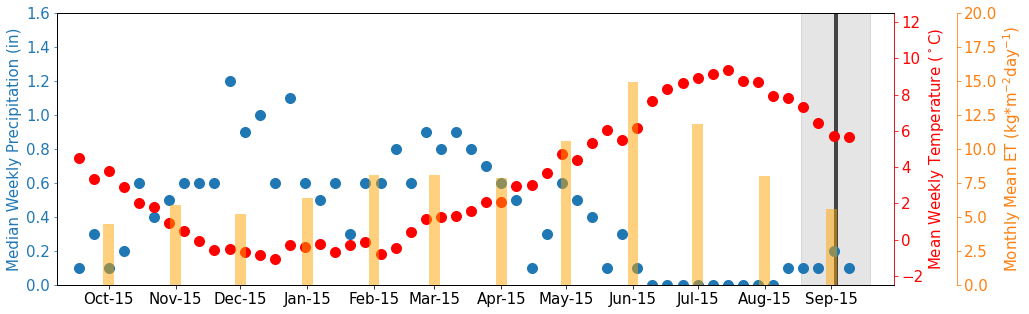

In [48]:
## two week rolling median
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
week_sum_all = []
all_weeks = pd.DataFrame()
year_range = range(2000, 2024)
for i in range(len(snotel_daily)-1):
    week_sum = snotel_daily[i]['Discrete_Precip_in'].groupby(pd.Grouper(freq='7D')).sum()
    week_sum = week_sum.reset_index()
    week_sum = week_sum.drop(columns=['Date'])
    week_sum = week_sum.rename(columns={"Discrete_Precip_in": "Discrete_Precip_in_"+str(year_range[i])})
    week_sum = week_sum[:-1] #remove last row because not a full week
    #display(len(week_sum))
    #week_sum_all.append(week_sum)
    all_weeks=pd.concat([all_weeks,week_sum],axis=1)
    
week_mean_precip = all_weeks.mean(axis=1)  
week_median_precip = all_weeks.median(axis=1) 
week_std_precip = all_weeks.std(axis=1) 
    
    
for i in range(len(snotel_daily)-1):
    week_sum = snotel_daily[i]['TAVG.D-1 (degC) '].groupby(pd.Grouper(freq='7D')).mean()
    week_sum = week_sum.reset_index()
    week_sum = week_sum.drop(columns=['Date'])
    week_sum = week_sum.rename(columns={'TAVG.D-1 (degC) ': 'Temp_'+str(year_range[i])})
    week_sum = week_sum[:-1] #remove last row because not a full week
    #display(len(week_sum))
    #week_sum_all.append(week_sum)
    all_weeks=pd.concat([all_weeks,week_sum],axis=1)

week_mean_temp = all_weeks.mean(axis=1)  
week_median_temp = all_weeks.median(axis=1) 
week_std_temp = all_weeks.std(axis=1) 


week_sum = snotel_daily[i]['Discrete_Precip_in'].groupby(pd.Grouper(freq='7D')).sum()
week_sum = week_sum.reset_index()
week_sum = week_sum[:-1] #remove last row because not a full week
week_date = week_sum['Date']

q3, q1 = np.percentile(master_data['flow_returns_doy'], [75 ,25])
iqr = q3 - q1

axis_label_size = 15
date_form = DateFormatter("%b-%d") # b = month with lower case name, d = day number %H:%M
fig = plt.figure(figsize=(15,5), facecolor='white')
ax1 = fig.add_subplot(1,1,1)
ax1.xaxis.set_major_formatter(date_form)
ax1.tick_params(axis='x', labelrotation=0, colors='black', labelsize=axis_label_size)
ax1.tick_params(axis='y', colors='black', labelsize=axis_label_size)
ax1.spines['right'].set_color('tab:blue')
ax1.tick_params(axis='y', colors='tab:blue', labelsize=axis_label_size)
ax1.set_ylabel('Median Weekly Precipitation (in)', size=axis_label_size, color = 'tab:blue')
ax1.set_ylim([0, 1.6])
ax1.axvspan(datetime.date(2022, 9, 1), datetime.date(2022, 10, 3), alpha=.10, color='black', label = 'Day Flow Returns IQR')
ax1.bar(datetime.date(2022, 9, 17), 100, width=2, align='center', color = 'black', alpha = 0.7, label = 'Median Day Flow Returns')
ax1.scatter(week_date,week_median_precip, s=100)
ax1.set_xticks(dcew_et_month_avg['DateTime'])
ax1.set_xticks(np.arange(0,1,13))
ax1.xaxis.set_major_locator(mdates.DayLocator(15))
ax1.set_xlim([datetime.date(2021, 9, 21),datetime.date(2022, 10, 14)])


space = 31
ax2 = ax1.twinx()
ax2.scatter(week_date, week_mean_temp, s=100, color = 'red')
week_std_temp
ax2.tick_params(axis='y', colors='red', labelsize=axis_label_size)
ax2.set_ylabel('Mean Weekly Temperature ($^\circ$C)', size=axis_label_size, color = 'red')
ax2.spines['right'].set_color('red')
ax2.tick_params(axis='y', colors='red', labelsize=axis_label_size)
ax2.set_ylim([-2.5, 12.5])

w = [31,31,30,31,32,29,30,30,30,30,30,31]
ax3 = ax1.twinx()
ax3.bar(dcew_et_month_avg['DateTime'] ,dcew_et_month_avg['Month_Average_ET'], width=5, align='center', color = 'orange', alpha = 0.5)
ax3.tick_params(axis='y', colors='black', labelsize=axis_label_size)
ax3.set_ylim([0, 20])
ax3.set_ylabel('Monthly Mean ET (kg*m$^{-2}$day$^{-1}$)', size=axis_label_size, color = 'tab:orange')
ax3.spines['right'].set_position(("axes", 1.075))
ax3.spines['right'].set_color('tab:orange')
ax3.tick_params(axis='y', colors='tab:orange', labelsize=axis_label_size)

fig.savefig('./results/figures/mean_weekly_precip&ET_noreturn', dpi=300, bbox_inches='tight')

0.05988312474825502

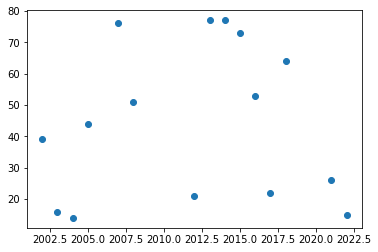

In [49]:
from scipy.stats import pearsonr
master_data[master_data == 'NaN'] = np.nan #set nan values
master_data[master_data == ' '] = np.nan #set nan values

data_filtered = master_data.dropna(axis=0) #drop any row with NaN
x = data_filtered['year']
y = data_filtered['days_no_flow_observed']

coef, p = pearsonr(x,y)
plt.scatter(x, y)
display(coef)